In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

## Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

## Data dictionary:

1) Carat:   Carat weight of the cubic zirconia.

2) Cut:     Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

3) Color:   Colour of the cubic zirconia.With D being the worst and J the best.

4) Clarity:	Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

5) Depth:	The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

6) Table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

7)  Price: the Price of the cubic zirconia.

8)  X: Length of the cubic zirconia in mm.

9) Y: Width of the cubic zirconia in mm.

10) Z: Height of the cubic zirconia in mm:

## 1.1. Read the data and do exploratory data analysis. 

## Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). 

## Perform Univariate and Bivariate Analysis.

## Data description

In [2]:
df_zir=pd.read_csv('cubic_zirconia.csv')
df_zir.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
df_zir.shape

(26967, 11)

In [4]:
df_zir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


'depth' has null values

3 object variables


In [5]:
df_zir.duplicated().sum()

0

In [6]:
df_zir.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [7]:
round(df_zir.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.00,7784.85,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.80,0.48,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.75,1.41,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.46,2.23,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.73,1.13,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.73,1.17,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.54,0.72,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.52,4024.86,326.0,945.00,2375.00,5360.00,18818.00


In [8]:
dfz = df_zir.drop('Unnamed: 0', axis=1)
dfz.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [9]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [10]:
dfz.duplicated().sum()

34

In [11]:
dfz.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [12]:
round(dfz.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.80,0.48,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.75,1.41,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.46,2.23,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.73,1.13,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.73,1.17,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.54,0.72,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.52,4024.86,326.0,945.00,2375.00,5360.00,18818.00


1) Carat:

Mean weight of all zirconia cubes is 0.80 carats. 


2) Depth:
    
Average height of zirconia cubes is 61.75. 

3) Table:

Average width is 57.46. 

4) Parameters of cube: X, Y, Z

Average length and width is same, i.e., 5.73. But, cube avg height is 3.54, less compared to length and width.

5) Price: (Target variable)

Average price is ~3939 \
Max price is ~18818\
Min price is ~326

6) All the parameters have less variation except 'Price' feature

In [13]:
dfz.cut.unique() #Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

5 types cuts are available

In [14]:
dfz.color.unique() 

#With D being the worst and J the best.


array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

7 kinds of colors are available

In [15]:
dfz.clarity.unique() 

#Clarity refers to the absence of the Inclusions and Blemishes. 
#(In order from Worst to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1


array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

8 different kinds of clarity zirconium cubicals are available

In [16]:
dfz.isnull().sum()


carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [17]:
dfz[dfz.depth.isnull()]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


## Data pre-processing

## Null treatment:

'depth' features has null values

In [18]:
dfz.depth.unique()

array([62.1, 60.8, 62.2, 61.6, 60.4, 61.5, 63.7, 63.8, 60.5, 60.7, 61.1,
       66.2, 61.2, 59.8, 61.9, 60. , 62.9, 62.7, 61.7, 62.4, 61.4,  nan,
       64. , 62.3, 63. , 59.9, 62.8, 61.3, 62. , 61. , 63.9, 62.6, 62.5,
       61.8, 58. , 64.9, 60.9, 59.7, 63.2, 58.4, 59.4, 63.5, 63.1, 66.8,
       65.2, 60.6, 64.3, 60.2, 60.3, 65.5, 58.5, 68.3, 66.5, 63.3, 58.8,
       63.6, 63.4, 57.5, 59. , 58.7, 59.1, 64.1, 64.5, 64.4, 60.1, 57.6,
       70.6, 59.2, 59.3, 50.8, 58.9, 65.4, 58.6, 59.5, 56.7, 67. , 66. ,
       54.6, 59.6, 64.7, 66.9, 64.6, 64.8, 58.2, 57.9, 56.9, 66.4, 65. ,
       66.6, 57.4, 64.2, 58.1, 67.7, 55.2, 66.3, 65.3, 67.9, 67.6, 65.8,
       67.1, 65.1, 67.5, 56.6, 55.9, 57.3, 57.1, 57.8, 58.3, 65.7, 57.2,
       52.7, 56.1, 66.1, 56.3, 66.7, 54.7, 71.3, 67.3, 65.9, 71. , 57.7,
       53.4, 65.6, 56. , 68.9, 68.8, 55.3, 69.2, 53.1, 69.8, 56.5, 56.2,
       55.1, 55.5, 53.2, 56.8, 68.4, 67.8, 55.6, 67.2, 57. , 69. , 55.8,
       52.2, 53.8, 68.6, 68. , 68.7, 68.5, 70.2, 56

In [19]:
dfz.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

## Imputing missing values

In [20]:
mean = dfz.depth.mean()
dfz['depth'] = dfz['depth'].fillna(mean)
dfz.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [21]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


Null values treated successfully

In [22]:
dfz.depth.unique()

array([62.1       , 60.8       , 62.2       , 61.6       , 60.4       ,
       61.5       , 63.7       , 63.8       , 60.5       , 60.7       ,
       61.1       , 66.2       , 61.2       , 59.8       , 61.9       ,
       60.        , 62.9       , 62.7       , 61.7       , 62.4       ,
       61.4       , 61.74514656, 64.        , 62.3       , 63.        ,
       59.9       , 62.8       , 61.3       , 62.        , 61.        ,
       63.9       , 62.6       , 62.5       , 61.8       , 58.        ,
       64.9       , 60.9       , 59.7       , 63.2       , 58.4       ,
       59.4       , 63.5       , 63.1       , 66.8       , 65.2       ,
       60.6       , 64.3       , 60.2       , 60.3       , 65.5       ,
       58.5       , 68.3       , 66.5       , 63.3       , 58.8       ,
       63.6       , 63.4       , 57.5       , 59.        , 58.7       ,
       59.1       , 64.1       , 64.5       , 64.4       , 60.1       ,
       57.6       , 70.6       , 59.2       , 59.3       , 50.8 

## Duplicate records:

In [23]:
dfz.duplicated().sum()

34

In [24]:
dfz[dfz.duplicated()]

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


It can be inferred that duplicated records are significant to keep for analysis.

No anamolies observed

## Data visualization

## Univariate analysis

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

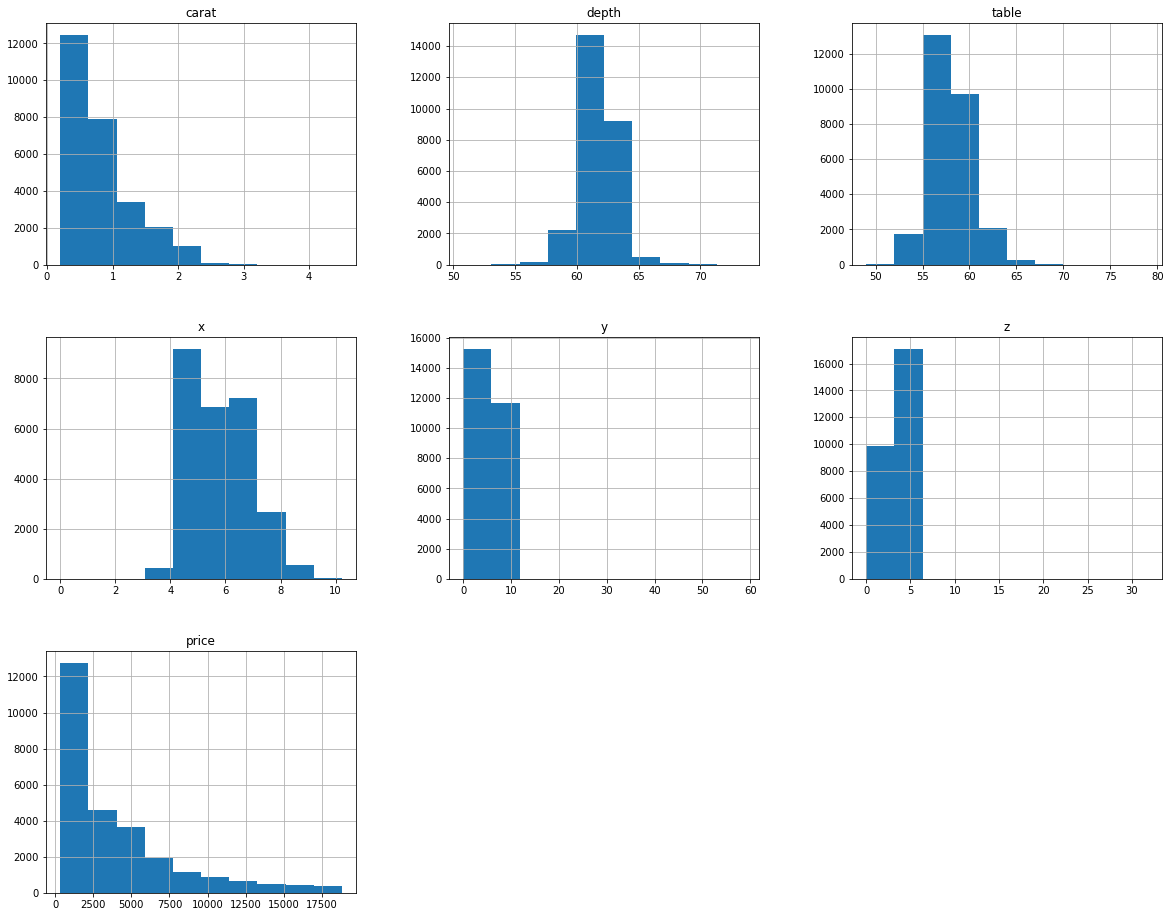

In [25]:
dfz.hist(figsize=(20,16))

In [26]:
round(dfz.skew(),2)

C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_2464\996611492.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  round(dfz.skew(),2)


carat    1.12
depth   -0.03
table    0.77
x        0.39
y        3.85
z        2.57
price    1.62
dtype: float64

Normally distributed features: 'depth', 'x'\
Moderately right skewed features: 'table'\
Highly right skewed features: 'carat', 'y', 'z', 'price'

In [27]:
dfz.select_dtypes(include=['float64','int64']).columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

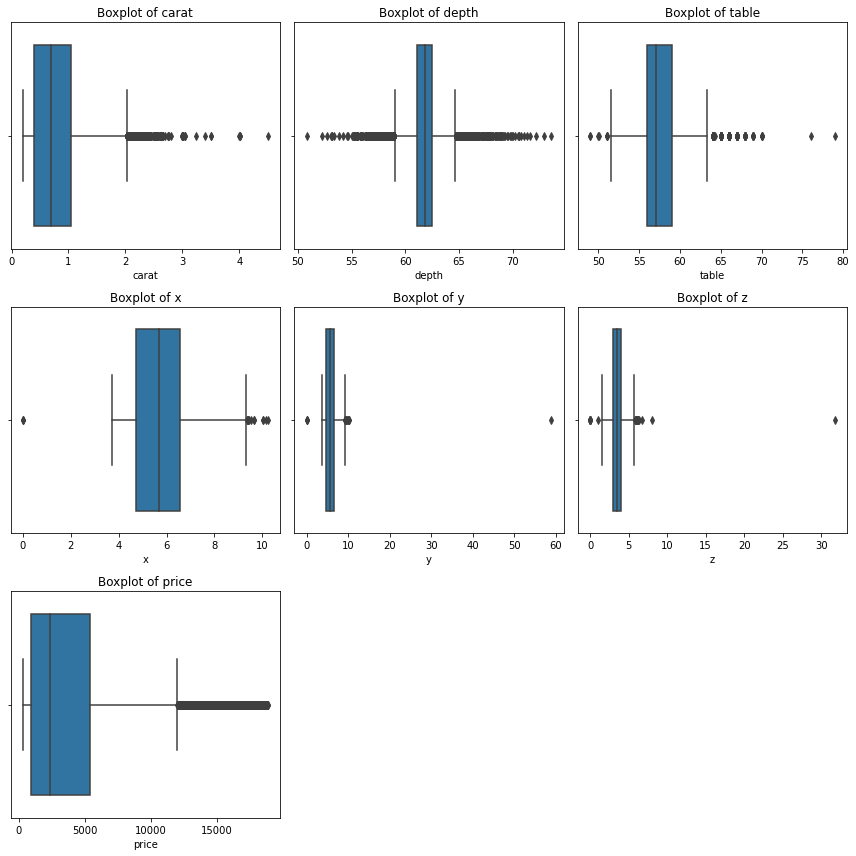

In [28]:
plt.figure(figsize = (12,12))
feature_list = dfz.select_dtypes(include=['float64','int64']).columns
for i in range(len(feature_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(dfz[feature_list[i]], data = dfz)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Every feature has outliers and need to be treated

In [29]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [30]:
for column in feature_list:
    lr,ur=remove_outlier(dfz[column])
    dfz[column]=np.where(dfz[column]>ur,ur,dfz[column])
    dfz[column]=np.where(dfz[column]<lr,lr,dfz[column])

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

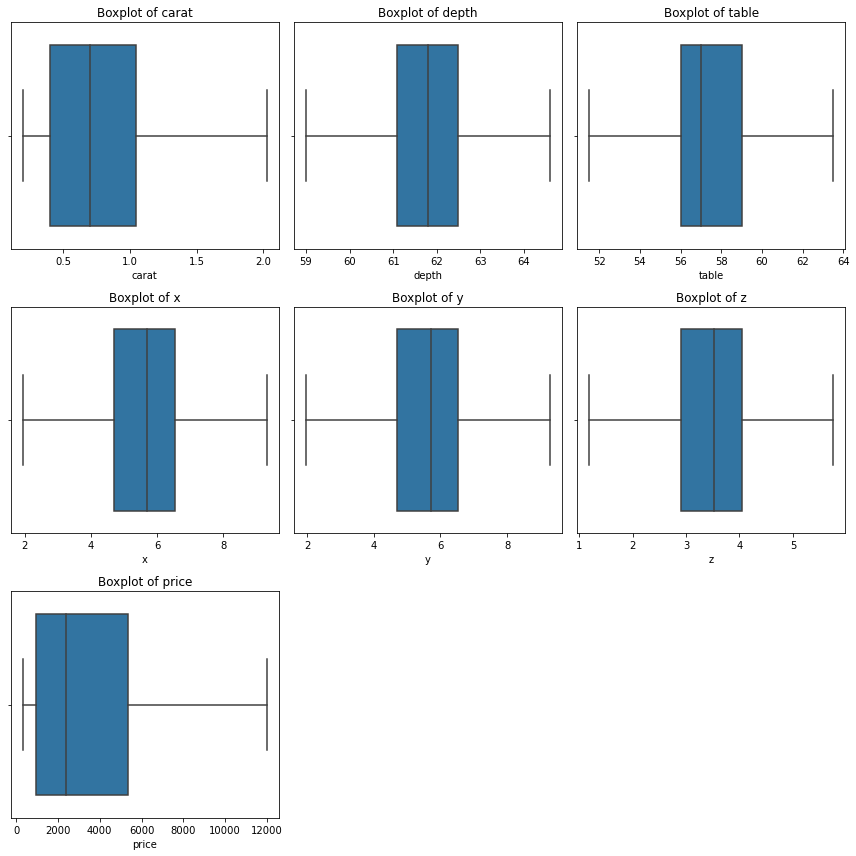

In [31]:
plt.figure(figsize = (12,12))
feature_list = dfz.select_dtypes(include=['float64','int64']).columns
for i in range(len(feature_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(dfz[feature_list[i]], data = dfz)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Outliers treated successfully

In [32]:
object = dfz.select_dtypes(include=['object']).columns
range(len(object))

range(0, 3)

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


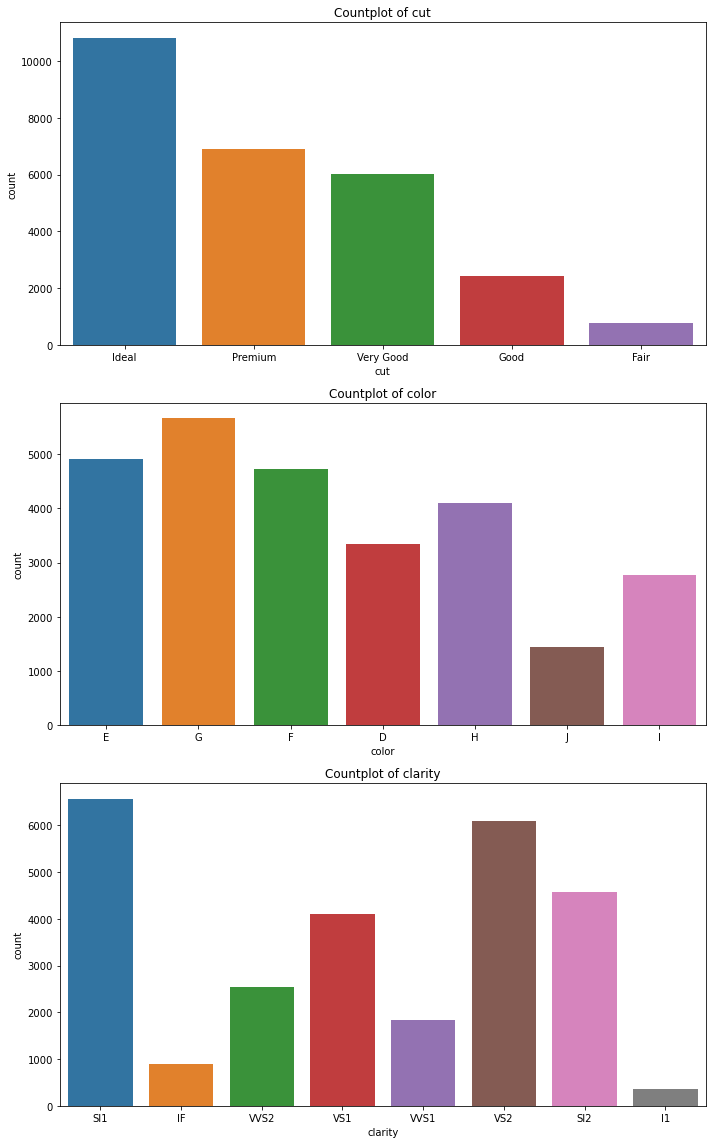

In [33]:
plt.figure(figsize=(10,16))
for i in range(len(object)):
    plt.subplot(3, 1, i + 1)
    sns.countplot(dfz[object[i]], data = dfz)
    plt.title('Countplot of {}'.format(object[i]))
    plt.tight_layout()

## Bivariate analysis:

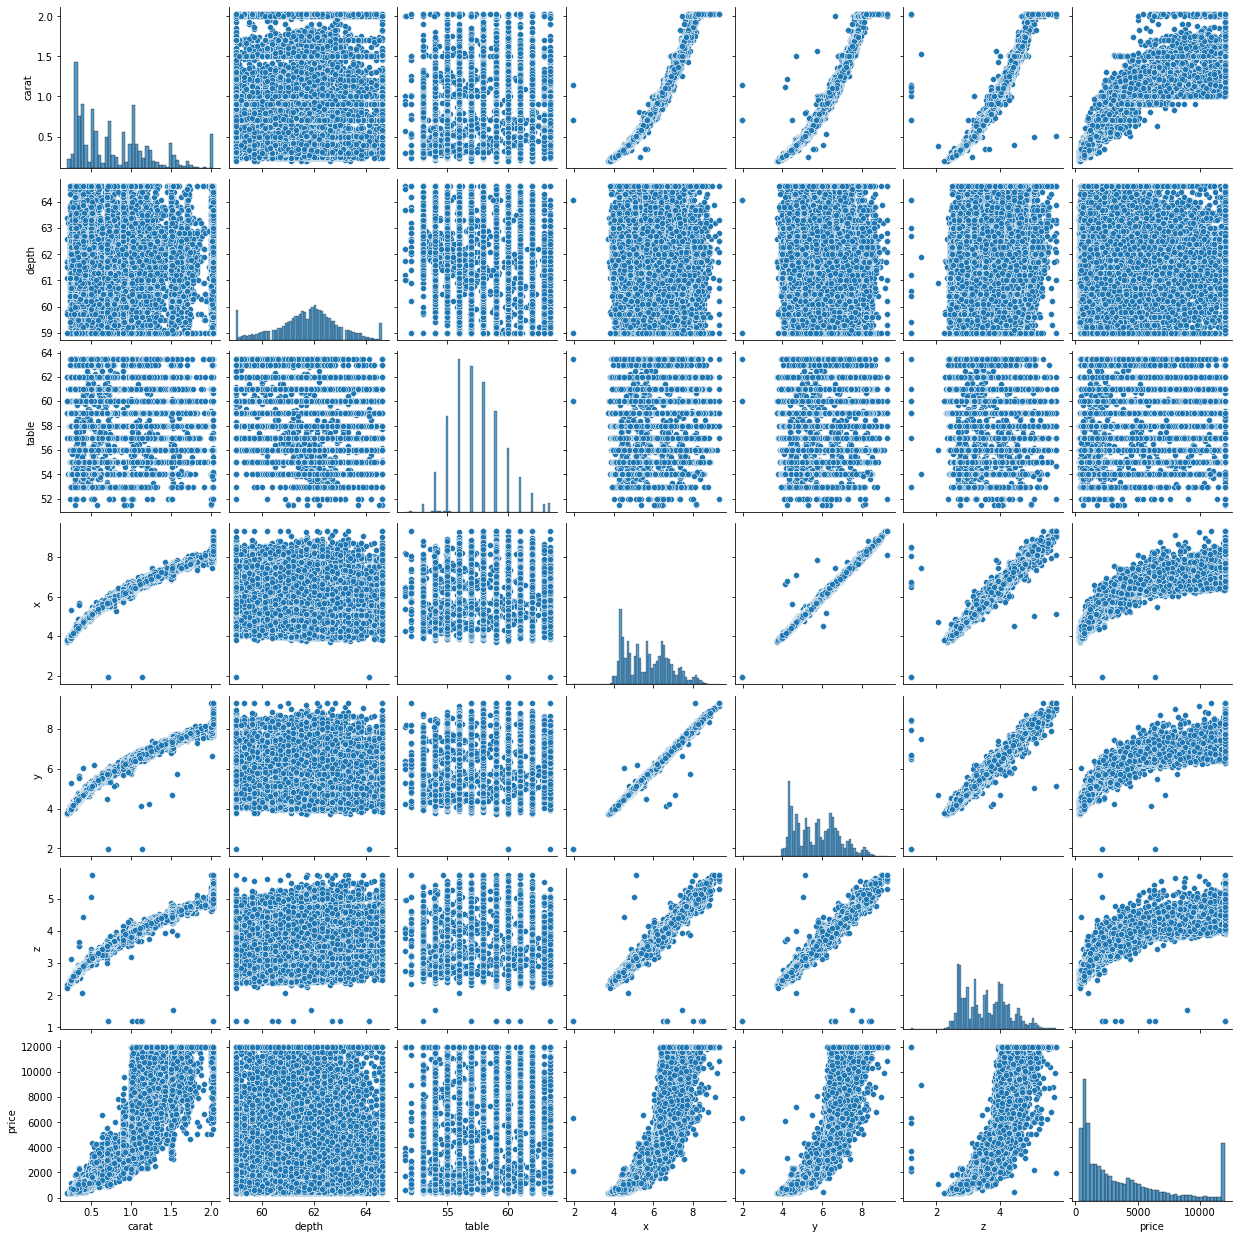

In [34]:
sns.pairplot(dfz);

<AxesSubplot:>

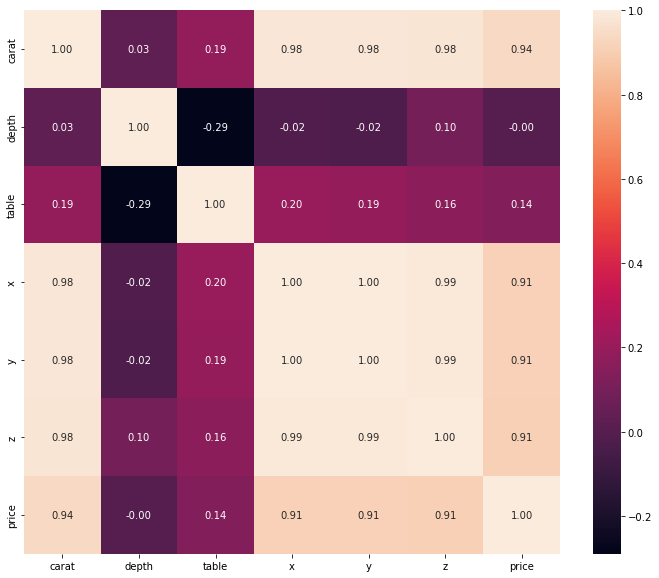

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(dfz.corr(), annot=True, fmt='.2f')

There is high correlation of price with carat, x, y, z



C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

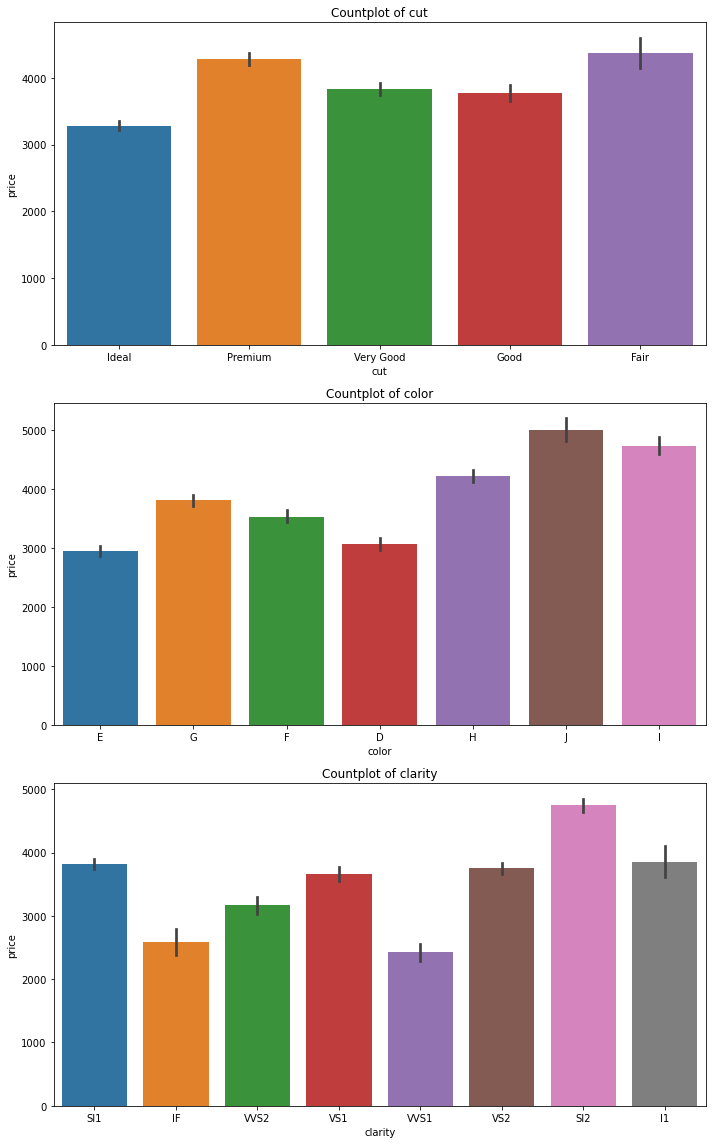

In [36]:
plt.figure(figsize=(10,16))
for i in range(len(object)):
    plt.subplot(3, 1, i + 1)
    sns.barplot(dfz[object[i]], dfz['price'])
    plt.title('Countplot of {}'.format(object[i]))
    plt.tight_layout()

## 1.2 Impute null values if present, also check for the values which are equal to zero. 

## Do they have any meaning or do we need to change them or drop them? 

## Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. 

## Explain why you are combining these sub levels with appropriate reasoning.

In [18]:
dfz.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [19]:
dfz[dfz['depth'].isnull()]

,carat,cut,color,clarity,depth,table,x,y,z,price


Yes, they have meaning, so we will imputed with mean during data pre-processing stage

In [22]:
dfz.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

Out of three categorical features available, all three are ordinal categorical variables. 

Let us check the possibility of combining these sub-levels by taking price into consideration.

In [20]:
dfz.groupby('cut')['price'].mean()

cut
Fair         4377.907810
Good         3773.801721
Ideal        3282.754993
Premium      4284.055443
Very Good    3832.066003
Name: price, dtype: float64

We can club 'fair' and 'premium' cut classes into one category as they have very minimum difference () in average price

And also for 'very good' and 'good' cut classes (difference 59)

In [21]:
dfz['cut']=np.where(dfz['cut']=='Very Good','Good',dfz['cut'])
dfz['cut']=np.where(dfz['cut']=='Fair','Premium',dfz['cut'])
dfz['cut'].unique()

array(['Ideal', 'Premium', 'Good'], dtype=object)

In [28]:
dfz.groupby('cut')['price'].mean()

cut
Good       3815.276591
Ideal      3282.754993
Premium    4293.599544
Name: price, dtype: float64

We have successfully combined sub levels bases its average price


In [29]:
dfz.groupby('color')['price'].mean()

color
E    3002.708026
F    3538.160922
G    3809.397191
H    4228.015968
I    4736.916997
J    5009.480596
Name: price, dtype: float64

With D being the worst and J the best.


D&E 112

In [30]:
dfz['color']=np.where(dfz['color']=='D','E',dfz['color'])
dfz['color'].unique()

array(['E', 'G', 'F', 'H', 'J', 'I'], dtype=object)

In [31]:
dfz.groupby('color')['price'].mean()

color
E    3002.708026
F    3538.160922
G    3809.397191
H    4228.015968
I    4736.916997
J    5009.480596
Name: price, dtype: float64

In [32]:
dfz.groupby('clarity')['price'].mean()

clarity
I1      3843.109589
IF      2588.392617
SI1     3814.173337
SI2     4746.349945
VS1     3653.389812
VS2     3750.660108
VVS1    2424.598695
VVS2    3168.175030
Name: price, dtype: float64

In order from Worst to Best in terms of avg price

IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1


VS1 & VS2 97



In [34]:
dfz['clarity']=np.where(dfz['clarity']=='VS1','VS',dfz['clarity'])
dfz['clarity']=np.where(dfz['clarity']=='VS2','VS',dfz['clarity'])

dfz['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS', 'VVS1', 'SI2', 'I1'], dtype=object)

In [36]:
dfz['clarity']=np.where(dfz['clarity']=='I1','SI1',dfz['clarity'])

dfz['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS', 'VVS1', 'SI2'], dtype=object)

In [37]:
dfz.groupby('clarity')['price'].mean()

clarity
IF      2588.392617
SI1     3815.696078
SI2     4746.349945
VS      3711.597380
VVS1    2424.598695
VVS2    3168.175030
Name: price, dtype: float64

## 1.3 Encode the data (having string values) for Modelling. 

## Split the data into train and test (70:30). 

## Apply Linear regression using scikit learn. 

## Perform checks for significant variables using appropriate method from statsmodel. 

## Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. 

## Compare these models and select the best one with appropriate reasoning

## Data encoding:

In [38]:
df = pd.get_dummies(dfz, columns=['cut','clarity','color'],drop_first=True)
df.head()

,carat,depth,table,x,y,z,price,cut_Ideal,cut_Premium,clarity_SI1,clarity_SI2,clarity_VS,clarity_VVS1,clarity_VVS2,color_F,color_G,color_H,color_I,color_J
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,1,0,1,0,0,0,0,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,1,0,0,0,0,0,0,1,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,1,0,0,0,1,0,0,1,0,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,1,0,0,0,0,1,0,1,0,0,0,0


In [39]:
df.shape

(26967, 19)

Encoding done

## Data splitting

In [25]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop('price', axis=1)
y= df[['price']]

In [51]:
print('Shape of X_train is', X_train.shape)
print('Shape of y_train is', y_train.shape)
print('Shape of X_test is', X_test.shape)
print('Shape of y_test is', y_test.shape)

Shape of X_train is (18876, 18)
Shape of y_train is (18876, 1)
Shape of X_test is (8091, 18)
Shape of y_test is (8091, 1)


Checking for multicollinearity:

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

Data splitting done

### Linear regression model using sklearn:

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lrmodel1= LinearRegression()
lrmodel1.fit(X_train,y_train)

LinearRegression()

In [54]:
lrmodel1.coef_

array([[ 9100.02201063,   -51.4462969 ,   -38.76158325, -1846.71673234,
         1539.28906404,  -275.39666454,   120.82067055,    58.49183427,
        -1518.84869499, -2191.62064909,  -752.39963333,  -186.98331618,
         -211.07584496,  -171.23586892,  -296.669918  ,  -723.80715146,
        -1189.92034945, -1764.94174367]])

In [55]:
for idx,col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, lrmodel1.coef_[0][idx]))

The coefficient for carat is 9100.022010627665
The coefficient for depth is -51.44629690492242
The coefficient for table is -38.761583252547595
The coefficient for x is -1846.7167323400931
The coefficient for y is 1539.2890640405776
The coefficient for z is -275.3966645445477
The coefficient for cut_Ideal is 120.82067054560483
The coefficient for cut_Premium is 58.491834270812774
The coefficient for clarity_SI1 is -1518.8486949902524
The coefficient for clarity_SI2 is -2191.6206490924437
The coefficient for clarity_VS is -752.3996333316974
The coefficient for clarity_VVS1 is -186.98331617970882
The coefficient for clarity_VVS2 is -211.0758449633182
The coefficient for color_F is -171.2358689228729
The coefficient for color_G is -296.6699179961387
The coefficient for color_H is -723.8071514639645
The coefficient for color_I is -1189.9203494466656
The coefficient for color_J is -1764.9417436727822


In [56]:
intercept=lrmodel1.intercept_
print('The intercept of defined model is {}'.format(intercept))

The intercept of defined model is [6093.44396952]


Scores:

In [57]:
round(lrmodel1.score(X_train, y_train),3)

0.932

In [58]:
round(lrmodel1.score(X_test, y_test),3)

0.929

Adjusted r2 score:
    

In [59]:
round(1 - (1-lrmodel1.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),3)


0.932

In [60]:
round(1 - (1-lrmodel1.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),3)


0.929

RMSE values:

In [63]:
predicted_train_lr = lrmodel1.fit(X_train, y_train).predict(X_train)
round(np.sqrt(metrics.mean_squared_error(y_train,predicted_train_lr)),2)

907.11

In [64]:
predicted_test = lrmodel1.fit(X_train, y_train).predict(X_test)
round(np.sqrt(metrics.mean_squared_error(y_test,predicted_test)),2)

921.24

### Linear regression model using statsmodel:

In [65]:
data_train1 = pd.concat([X_train, y_train], axis=1)
data_test1 =pd.concat([X_test,y_test],axis=1)
data_train1.head()

,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,clarity_SI1,clarity_SI2,clarity_VS,clarity_VVS1,clarity_VVS2,color_F,color_G,color_H,color_I,color_J,price
11687,0.41,62.3,56.0,4.77,4.73,2.96,1,0,0,0,0,0,1,0,0,0,1,0,1061.0
9728,1.71,62.8,57.0,7.58,7.55,4.75,1,0,1,0,0,0,0,0,0,0,0,1,6320.0
1936,0.33,61.8,62.0,4.40,4.45,2.74,0,0,1,0,0,0,0,1,0,0,0,0,536.0
26220,0.70,62.8,57.0,5.61,5.66,3.54,0,0,1,0,0,0,0,0,0,1,0,0,2214.0
18445,0.70,62.1,56.0,5.67,5.71,3.53,1,0,0,1,0,0,0,0,0,0,0,0,2575.0


In [66]:
data_train1.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Ideal', 'cut_Premium',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS', 'clarity_VVS1',
       'clarity_VVS2', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'price'],
      dtype='object')

In [67]:
expr1 = 'price ~ carat + depth + table + x + y + z + cut_Ideal + cut_Premium + clarity_SI1 + clarity_SI2 + clarity_VS + clarity_VVS1 + clarity_VVS2 + color_F + color_G + color_H + color_I + color_J'

In [68]:
import statsmodels.formula.api as smf
lrm1 = smf.ols(formula= expr1, data = data_train1).fit()
lrm1.params

Intercept       6093.443970
carat           9100.022011
depth            -51.446297
table            -38.761583
x              -1846.716732
y               1539.289064
z               -275.396665
cut_Ideal        120.820671
cut_Premium       58.491834
clarity_SI1    -1518.848695
clarity_SI2    -2191.620649
clarity_VS      -752.399633
clarity_VVS1    -186.983316
clarity_VVS2    -211.075845
color_F         -171.235869
color_G         -296.669918
color_H         -723.807151
color_I        -1189.920349
color_J        -1764.941744
dtype: float64

In [69]:
print(lrm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.436e+04
Date:                Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:31:11   Log-Likelihood:            -1.5533e+05
No. Observations:               18876   AIC:                         3.107e+05
Df Residuals:                   18857   BIC:                         3.109e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6093.4440    660.780      9.222   

In [70]:
# Calculate MSE
mse1 = np.mean((lrm1.predict(data_train1.drop('price',axis=1))-data_train1['price'])**2)

In [71]:
#Root Mean Squared Error - RMSE
np.sqrt(mse1)

907.1141095031456

In [72]:
np.sqrt(lrm1.mse_resid) #another way

907.5709910007103

In [73]:
# Prediction on Test data
y_pred1 = lrm1.predict(data_test1)

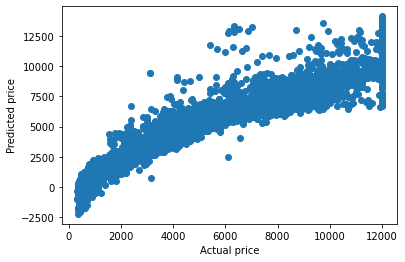

In [76]:
plt.scatter(y_test['price'], y_pred1)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

In [77]:
lrm1.params.reset_index()

,index,0
0,Intercept,6093.443970
1,carat,9100.022011
2,depth,-51.446297
3,table,-38.761583
4,x,-1846.716732
5,y,1539.289064
6,z,-275.396665
7,cut_Ideal,120.820671
8,cut_Premium,58.491834
9,clarity_SI1,-1518.848695


In [78]:
for i,j in np.array(lrm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end='')

(6093.44) * Intercept +(9100.02) * carat +(-51.45) * depth +(-38.76) * table +(-1846.72) * x +(1539.29) * y +(-275.4) * z +(120.82) * cut_Ideal +(58.49) * cut_Premium +(-1518.85) * clarity_SI1 +(-2191.62) * clarity_SI2 +(-752.4) * clarity_VS +(-186.98) * clarity_VVS1 +(-211.08) * clarity_VVS2 +(-171.24) * color_F +(-296.67) * color_G +(-723.81) * color_H +(-1189.92) * color_I +(-1764.94) * color_J +

### Ridge model:

In [79]:
from sklearn.linear_model import Ridge


In [80]:
ridge = Ridge(alpha=.3)  #alpha or lambda
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [[ 9078.14335728   -51.31668904   -38.77118772 -1818.67127495
   1518.68770241  -273.50240021   120.3850265     57.20041345
  -1517.26512095 -2189.7251098   -750.6975906   -184.67627462
   -208.98165995  -171.00928266  -296.26322821  -723.1242905
  -1188.75792902 -1763.17626217]]


In [81]:
for idx,col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, ridge.coef_[0][idx]))

The coefficient for carat is 9078.143357280667
The coefficient for depth is -51.31668904471771
The coefficient for table is -38.77118771639951
The coefficient for x is -1818.671274950101
The coefficient for y is 1518.6877024092414
The coefficient for z is -273.50240021007045
The coefficient for cut_Ideal is 120.38502650076374
The coefficient for cut_Premium is 57.20041345154347
The coefficient for clarity_SI1 is -1517.2651209498488
The coefficient for clarity_SI2 is -2189.7251097957637
The coefficient for clarity_VS is -750.6975905950619
The coefficient for clarity_VVS1 is -184.67627461749106
The coefficient for clarity_VVS2 is -208.9816599531266
The coefficient for color_F is -171.0092826641814
The coefficient for color_G is -296.2632282091902
The coefficient for color_H is -723.1242905043367
The coefficient for color_I is -1188.757929021815
The coefficient for color_J is -1763.1762621677842


In [82]:
intercept_ridge=ridge.intercept_
print('The intercept of defined model is {}'.format(intercept_ridge))

The intercept of defined model is [6052.42349278]


R2 svalue:

In [83]:
round(ridge.score(X_train, y_train),3)


0.932

In [84]:
round(ridge.score(X_test, y_test),3)

0.929

Adjusted R2:

In [85]:
round(1 - (1-ridge.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),3)


0.932

In [86]:
round(1 - (1-ridge.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),3)


0.929

RMSE values:

In [87]:
predicted_train_ridge = ridge.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train_ridge))

907.1166973231886

In [88]:
predicted_test_ridge = ridge.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test_ridge))

921.1565256291974

### Lasso model:

In [89]:
from sklearn.linear_model import Lasso

In [90]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))



Lasso model: [ 9060.73073487   -52.59150329   -39.4516485  -1516.69943722
  1226.87278978  -280.61047273   112.82386603    38.25699715
 -1507.84856586 -2180.96200419  -740.72647574  -171.44283489
  -196.68680145  -169.13322443  -293.9107046   -721.02791582
 -1185.57122848 -1758.11336983]


C:\Users\sireesha\PGDBA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5626601145.307922, tolerance: 22837993.753524963
  model = cd_fast.enet_coordinate_descent(


In [91]:
for idx,col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, lasso.coef_[idx]))

The coefficient for carat is 9060.730734866442
The coefficient for depth is -52.5915032862889
The coefficient for table is -39.45164849840563
The coefficient for x is -1516.6994372195247
The coefficient for y is 1226.8727897794213
The coefficient for z is -280.610472729601
The coefficient for cut_Ideal is 112.82386603427734
The coefficient for cut_Premium is 38.256997151327774
The coefficient for clarity_SI1 is -1507.848565856717
The coefficient for clarity_SI2 is -2180.962004191366
The coefficient for clarity_VS is -740.7264757393582
The coefficient for clarity_VVS1 is -171.4428348904038
The coefficient for clarity_VVS2 is -196.686801454295
The coefficient for color_F is -169.13322443294498
The coefficient for color_G is -293.91070459831917
The coefficient for color_H is -721.0279158164391
The coefficient for color_I is -1185.5712284847384
The coefficient for color_J is -1758.1133698270135


In [92]:
intercept_lasso=lasso.intercept_
print('The intercept of defined model is {}'.format(intercept_lasso))

The intercept of defined model is [6148.61705346]


R2 values:

In [99]:
round(lasso.score(X_train, y_train),3)


0.932

In [100]:
round(lasso.score(X_test, y_test),3)

0.929

Adjusted R2:

In [95]:
round(1 - (1-lasso.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),3)


0.932

In [96]:
round(1 - (1-lasso.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),3)


0.929

RMSE values:

In [97]:
predicted_train_lasso = lasso.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train_lasso))

C:\Users\sireesha\PGDBA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5626601145.307922, tolerance: 22837993.753524963
  model = cd_fast.enet_coordinate_descent(


907.2530034466292

In [98]:
predicted_test_lasso = lasso.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test_lasso))

C:\Users\sireesha\PGDBA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5626601145.307922, tolerance: 22837993.753524963
  model = cd_fast.enet_coordinate_descent(


920.8355283143329

## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

Inference: Basis on these predictions, what are the business insights andrecommendations.Ans: Business Insights:Based on the EDA analysis, it is clear that ideal cut brings inthe maximum profit to the company and the colors H,I and J bring in profit whereasthe other colors don’t. Additionally, the fair and good cuts are not bringing any profitto the company.\
  Recommendations: Company should focus on carat and clarity of the stone to increasepricing and thereby the profit. Good customer base and marketing strategy needs tobe adopted to attract customers to buy the stones which gives more profit.

## Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

## Data Dictionary:

1) Holiday_Package: 	 Opted for Holiday Package yes/no?

2) Salary: 	 Employee salary

3) age: 	 Age in years

4) edu: 	 Years of formal education

5) no_young_children: 	 The number of young children (younger than 7 years)

6) no_older_children: 	 Number of older children

7) foreign: 	 foreigner Yes/No

## 2.1 Data Ingestion: \

### Read the dataset. 

### Do the descriptive statistics and do null value condition check, write an inference on it. 

### Perform Univariate and Bivariate Analysis. Do exploratory data analysis

#### Data description

In [2]:
df_hol = pd.read_csv('Holiday_Package.csv')
df_hol.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [3]:
df_hol['Unnamed: 0'].nunique()

872

In [4]:
dfh = df_hol.drop('Unnamed: 0', axis=1)
dfh.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [5]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [6]:
dfh.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


1) Salary: Variation is high in this feature with mean salary of ~47729

2) Age: Employees age is b/w 20 and 62. There is no variation in this feature

3) educ: Average formal education of employees is ~9.3 years. There is slight variation in this feature.

In [7]:
dfh.educ.value_counts()

8     157
12    124
9     114
11    100
10     90
5      67
4      50
13     43
7      31
14     25
6      21
15     15
3      11
16     10
2       6
17      3
19      2
21      1
18      1
1       1
Name: educ, dtype: int64

4) no_young_children: 

In [8]:
dfh['no_young_children'].unique()

array([1, 0, 2, 3], dtype=int64)

In [9]:
dfh['no_young_children'].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

Majority of the employees are not having young children

5) no_older_children: 

In [10]:
dfh['no_older_children'].unique()

array([1, 0, 2, 4, 3, 5, 6], dtype=int64)

In [11]:
dfh['no_older_children'].value_counts()

0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64

Approximately, half majority of employees are having no older children and another half majority of employees are having one and two older children

In [12]:
dfh.duplicated().sum()

0

#### Data pre-processing:

In [13]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


There are no missing values

There are 5 numeric and 2 object type variables.

#### Data visualization:

Univariate analysis:

In [ ]:
dfh.hist(figsize=(20,18))

In [ ]:
round(dfh.skew(),2)

Normally distributed features: age, educ\
Moderately right skewed features: no_older children\
Highly right skewed features: salary, no_young children

In [ ]:
dfh.select_dtypes(include=['float64','int64']).columns

C:\Users\sireesha\PGDBA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sireesha\PGDBA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sireesha\PGDBA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sireesha\PGDBA\lib\site-p

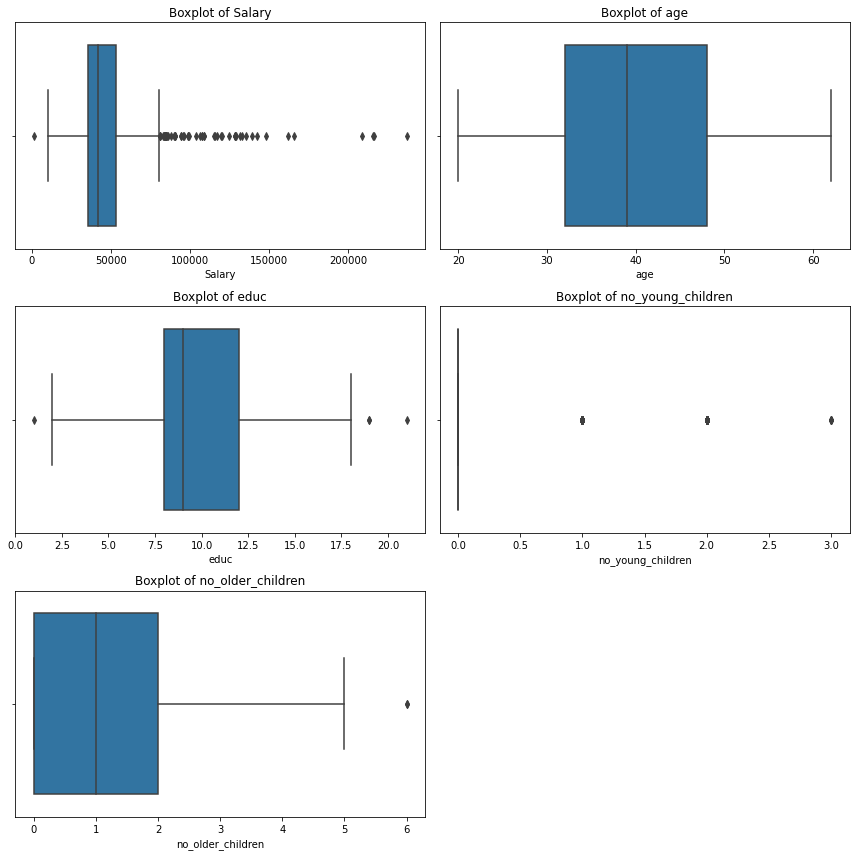

In [14]:
plt.figure(figsize = (12,12))
feature_list = dfh.select_dtypes(include=['float64','int64']).columns
for i in range(len(feature_list)):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(dfh[feature_list[i]], data = dfh)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Although outliers exists as per the boxplot, by looking at the data distribution in describe(), categorical variables data will be lost and model will not be appropriate. \
So, outliers are not treated in this case

In [16]:
object = dfh.select_dtypes(include=['object']).columns
range(len(object))

range(0, 2)

C:\Users\sireesha\PGDBA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sireesha\PGDBA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


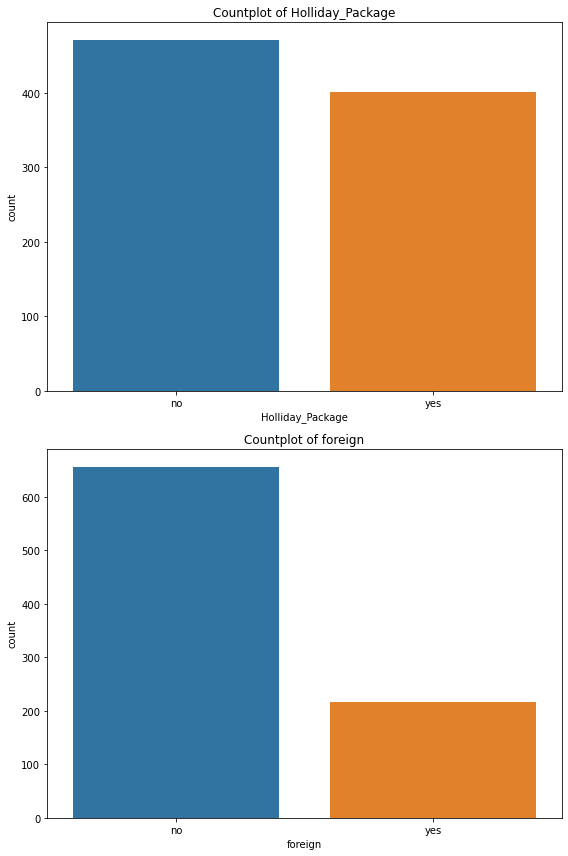

In [17]:
plt.figure(figsize=(8,12))
for i in range(len(object)):
    plt.subplot(2, 1, i + 1)
    sns.countplot(dfh[object[i]], data = dfh)
    plt.title('Countplot of {}'.format(object[i]))
    plt.tight_layout()

In [ ]:
dfh['Holliday_Package'].value_counts()

In [ ]:
print('percentage of employees opted for holiday package is', round(401/872,2))

In [ ]:
print('percentage of employees not opted for holiday package is', round(471/872,2))

In [ ]:
dfh['foreign'].value_counts()

In [ ]:
print('percentage of foreign employees is', round(216/872,2))

In [ ]:
print('percentage of non-foreign employees is', round(656/872,2))

### Bivariate analysis:

In [ ]:
sns.pairplot(dfh, hue='Holliday_Package');

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(dfh.corr(), annot=True, fmt='.2f')

There is no appreciable correlation between the features

In [ ]:
pd.crosstab(dfh['foreign'],dfh['Holliday_Package']).plot(kind='bar')
plt.title('Holliday_Package Vs. foreign')
plt.xlabel('foreign')
plt.ylabel('Holliday_Package')


## 2.2 Do not scale the data. 

### Encode the data (having string values) for Modelling. 

### Data Split: Split the data into train and test (70:30).

### Apply Logistic Regression and LDA (linear discriminant analysis).

### Data encoding:

In [18]:
## Converting the 'holiday_package' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [19]:
dfh['Holliday_Package'] = LE.fit_transform(dfh['Holliday_Package'])
dfh.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,no
1,1,37207,45,8,0,1,no
2,0,58022,46,9,0,0,no
3,0,66503,31,11,2,0,no
4,0,66734,44,12,0,2,no


In [20]:
df = pd.get_dummies(dfh,drop_first=True)
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [21]:
df.shape

(872, 7)

### Data splitting:

In [22]:
X1 = df.drop('Holliday_Package', axis=1)
y1= df[['Holliday_Package']]

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30 , random_state=1, stratify= df['Holliday_Package'])

In [27]:
print('X1_train', X1_train.shape)
print('X1_test', X1_test.shape)
print('y1_train', y1_train.shape)
print('y1_test', y1_test.shape)

X1_train (610, 6)
X1_test (262, 6)
y1_train (610, 1)
y1_test (262, 1)


In [ ]:
y1_train.value_counts()

In [ ]:
y1_test.value_counts()

### Logistic regression:

In [1]:
from sklearn.linear_model import LogisticRegression


In [29]:
# Fit the model on original data i.e. before upsampling
lor = LogisticRegression(max_iter=10000, class_weight= 'balanced')
lor.fit(X1_train, y1_train)


C:\Users\sireesha\PGDBA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(class_weight='balanced', max_iter=10000)

### LDA:

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [31]:
clf = LinearDiscriminantAnalysis()
lda= clf.fit(X1_train,y1_train)
lda

C:\Users\sireesha\PGDBA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearDiscriminantAnalysis()

## 2.3 Performance Metrics: 

### Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model 

### Final Model: Compare Both the models and write inference which model is best/optimized.

### Logistic regression:

In [32]:
# Prediction

y1train_predict_lor = lor.predict(X1_train)
y1test_predict_lor = lor.predict(X1_test)

In [33]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

#### Train dataset:

In [34]:
## Confusion matrix on the training data

confusion_matrix(y1_train, y1train_predict_lor)


array([[222, 107],
       [176, 105]], dtype=int64)

In [35]:
print(classification_report(y1_train, y1train_predict_lor));

              precision    recall  f1-score   support

           0       0.56      0.67      0.61       329
           1       0.50      0.37      0.43       281

    accuracy                           0.54       610
   macro avg       0.53      0.52      0.52       610
weighted avg       0.53      0.54      0.53       610



##### Model evaluation:


In [36]:
# Accuracy - Training Data
lor.score(X1_train, y1_train)

0.5360655737704918

In [37]:
# predict probabilities
probs_lor = lor.predict_proba(X1_train)

# keep probabilities for the positive outcome only
probs_lor = probs_lor[:, 1]
# calculate AUC

auc = roc_auc_score(y1_train, probs_lor)
print('AUC: %.3f' % auc)

AUC: 0.566


Text(0.5, 1.0, 'ROC curve')

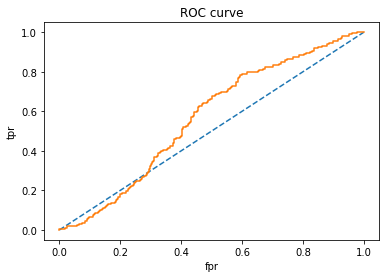

In [39]:
# calculate roc curve
train_fpr_lor, train_tpr_lor, train_thresholds_lor = roc_curve(y1_train, probs_lor)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_lor, train_tpr_lor);\
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

#### Test data:

In [40]:
## Confusion matrix on the testing data

confusion_matrix(y1_test, y1test_predict_lor)


array([[86, 56],
       [61, 59]], dtype=int64)

In [41]:
print(classification_report(y1_test, y1test_predict_lor));

              precision    recall  f1-score   support

           0       0.59      0.61      0.60       142
           1       0.51      0.49      0.50       120

    accuracy                           0.55       262
   macro avg       0.55      0.55      0.55       262
weighted avg       0.55      0.55      0.55       262



##### Model evaluation:

In [42]:
# Accuracy - Test Data
lor.score(X1_test, y1_test)

0.5534351145038168

In [43]:
# predict probabilities
probs_test_lor = lor.predict_proba(X1_test)

# keep probabilities for the positive outcome only
probs_test_lor = probs_test_lor[:, 1]
# calculate AUC

auc = roc_auc_score(y1_test, probs_test_lor)
print('AUC: %.3f' % auc)

AUC: 0.599


Text(0.5, 1.0, 'ROC curve')

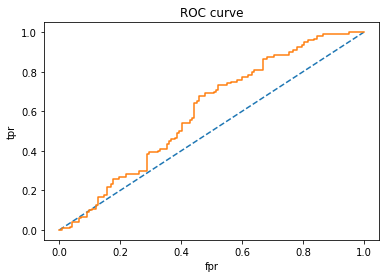

In [44]:
# calculate roc curve

train_fpr_lor, train_tpr_lor, train_thresholds_lor = roc_curve(y1_test, probs_test_lor)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.plot(train_fpr_lor, train_tpr_lor);
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

### LDA:

In [45]:
# Prediction

y1train_predict_lda = lda.predict(X1_train)
y1test_predict_lda = lda.predict(X1_test)

#### Train dataset:

In [46]:
## Confusion matrix on the training data

confusion_matrix(y1_train, y1train_predict_lda)

array([[243,  86],
       [119, 162]], dtype=int64)

In [47]:
print(classification_report(y1_train, y1train_predict_lda));

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



##### Model evaluation:

In [48]:
# Accuracy - Training Data

lda.score(X1_train, y1_train)

0.6639344262295082

In [49]:
# predict probabilities
probs_lda = lda.predict_proba(X1_train)

# keep probabilities for the positive outcome only
probs_lda = probs_lda[:, 1]
# calculate AUC

auc = roc_auc_score(y1_train, probs_lda)
print('AUC: %.3f' % auc)

AUC: 0.733


Text(0.5, 1.0, 'ROC curve')

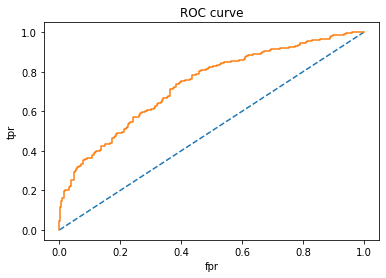

In [50]:
# calculate roc curve

train_fpr_lda, train_tpr_lda, train_thresholds_lda = roc_curve(y1_train, probs_lda)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(train_fpr_lda, train_tpr_lda);
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

#### Test data:

In [51]:
## Confusion matrix on the training data

confusion_matrix(y1_test, y1test_predict_lda)

array([[109,  33],
       [ 61,  59]], dtype=int64)

In [52]:
print(classification_report(y1_test, y1test_predict_lda));

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262



### Model evaluation:

In [53]:
# Accuracy - Test Data
lda.score(X1_test, y1_test)

0.6412213740458015

In [54]:
# predict probabilities
probs_test_lda = lda.predict_proba(X1_test)

# keep probabilities for the positive outcome only
probs_test_lda = probs_test_lda[:, 1]
# calculate AUC

auc = roc_auc_score(y1_test, probs_test_lda)
print('AUC: %.3f' % auc)

AUC: 0.714


Text(0.5, 1.0, 'ROC curve')

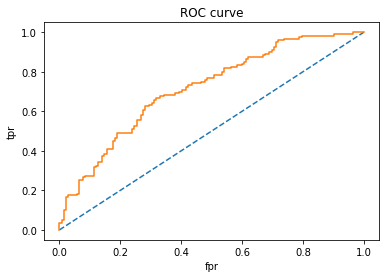

In [55]:
# calculate roc curve
train_fpr_lda, train_tpr_lda, train_thresholds_lda = roc_curve(y1_test, probs_test_lda)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_lda, train_tpr_lda);
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

## 2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.